In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df_external = pd.read_csv('Chatgpt_corpus_14_symptoms__180_note_new.csv', encoding='ISO-8859-1')
df_external

,note id,TEXT,Fatigue,Depressed_Mood,Constipation,Anxiety,Swelling,Nausea,Appetite_Loss,Pain,Numbness,Impaired_Memory,Pruritus,Shortness_of_Breath,Disturbed_Sleep,Counted
0,70148097,In the case of the patient reviewed this morni...,0,1,0,0,0,0,0,0.0,1,0,0,0,0,2
1,217167512,"Over the last 8 hours, the patient's vital sig...",0,0,0,0,0,0,1,0.0,0,0,0,0,0,1
2,545048125,A 74-year-old female with a history of adenoca...,0,1,0,0,0,0,0,0.0,0,0,0,1,0,2
3,119716181,"The patient, a student actively engaged in wor...",1,0,0,0,0,0,0,NaN,0,0,0,0,0,0
4,39350104,"a 53-year-old male, had a clinic visit on 12/...",0,0,0,0,0,0,0,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3696519,A 73-year-old male patient with a complex medi...,0,0,0,0,1,0,0,1.0,1,0,0,1,0,4
176,545205250,"In a physical therapy session dated 07/24/18, ...",1,0,0,1,0,0,0,1.0,1,0,0,0,1,4
177,348706864,A patient with a history of arthropathy and ty...,0,0,1,0,0,0,0,1.0,0,0,1,0,0,3
178,1336650425,A patient with a history of malignant melanoma...,0,1,0,1,0,1,0,1.0,0,1,0,0,1,6


In [27]:
df_external = df_external.rename(columns={
    'TEXT': 'Note'})

In [28]:
print(df_external.columns)

Index(['note id', 'Note', 'Fatigue', 'Depressed_Mood', 'Constipation',
       'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss', 'Pain', 'Numbness',
       'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep',
       'Counted'],
      dtype='object')


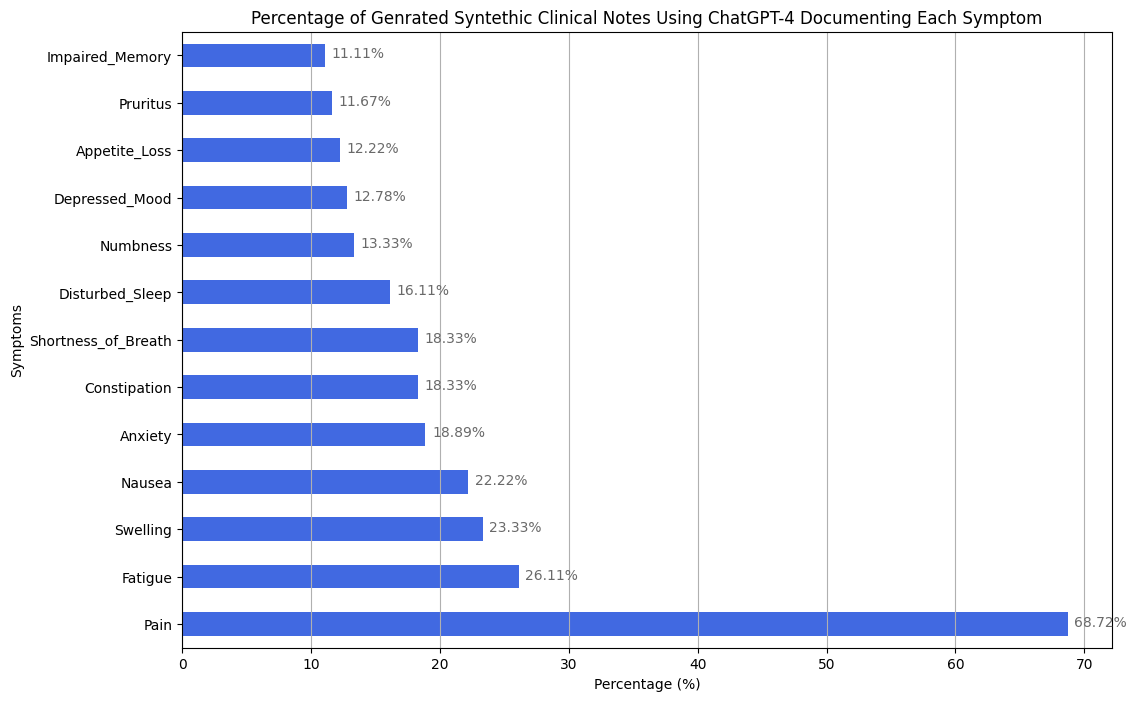

'sorted_desc_symptom_percentages_plot_vertical.png'

In [29]:
# Recreating the plot with percentages displayed on each bar, sorted in descending order

# Sorting the symptom percentages in descending order
sorted_symptom_percentages_desc = df_external .drop(columns=['note id', 'Note', 'Counted']).mean().sort_values(ascending=False) * 100

# Creating a vertical bar plot with sorted data
plt.figure(figsize=(12, 8))
ax = sorted_symptom_percentages_desc.plot(kind='barh', color='royalblue')  # Horizontal bar chart
plt.title('Percentage of Genrated Syntethic Clinical Notes Using ChatGPT-4 Documenting Each Symptom')
plt.ylabel('Symptoms')
plt.xlabel('Percentage (%)')
plt.grid(axis='x')

# Adding the percentage values on each bar
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + 0.2, str(round(i.get_width(), 2)) + '%', fontsize=10, color='dimgrey')

# Saving the plot as a PNG file
sorted_desc_plot_path_vertical = 'sorted_desc_symptom_percentages_plot_vertical.png'
plt.savefig(sorted_desc_plot_path_vertical)

# Showing the plot
plt.show()

# Providing the file path for download
sorted_desc_plot_path_vertical


In [30]:
# Define a function to clean text data
import re  # Import the re module for regular expressions

def clean_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Replace 3 or more consecutive non-alphanumeric characters with 1 white space
    text = re.sub(r'[^a-zA-Z0-9\s]{3,}', ' ', text)
    
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    return text.strip()  # Trim whitespace from beginning and end

# Clean the 'SentText' column in-place
df_external['Note'] = df_external['Note'].apply(clean_text)
df_external

,note id,Note,Fatigue,Depressed_Mood,Constipation,Anxiety,Swelling,Nausea,Appetite_Loss,Pain,Numbness,Impaired_Memory,Pruritus,Shortness_of_Breath,Disturbed_Sleep,Counted
0,70148097,in the case of the patient reviewed this morni...,0,1,0,0,0,0,0,0.0,1,0,0,0,0,2
1,217167512,over the last hours the patients vital signs h...,0,0,0,0,0,0,1,0.0,0,0,0,0,0,1
2,545048125,a yearold female with a history of adenocarcin...,0,1,0,0,0,0,0,0.0,0,0,0,1,0,2
3,119716181,the patient a student actively engaged in work...,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0
4,39350104,a yearold male had a clinic visit on for a fol...,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3696519,a yearold male patient with a complex medical ...,0,0,0,0,1,0,0,1.0,1,0,0,1,0,4
176,545205250,in a physical therapy session dated a yearold ...,1,0,0,1,0,0,0,1.0,1,0,0,0,1,4
177,348706864,a patient with a history of arthropathy and ty...,0,0,1,0,0,0,0,1.0,0,0,1,0,0,3
178,1336650425,a patient with a history of malignant melanoma...,0,1,0,1,0,1,0,1.0,0,1,0,0,1,6


In [31]:
# Drop the 'counted' column
df_external = df_external.drop('Counted', axis=1)
df_external

,note id,Note,Fatigue,Depressed_Mood,Constipation,Anxiety,Swelling,Nausea,Appetite_Loss,Pain,Numbness,Impaired_Memory,Pruritus,Shortness_of_Breath,Disturbed_Sleep
0,70148097,in the case of the patient reviewed this morni...,0,1,0,0,0,0,0,0.0,1,0,0,0,0
1,217167512,over the last hours the patients vital signs h...,0,0,0,0,0,0,1,0.0,0,0,0,0,0
2,545048125,a yearold female with a history of adenocarcin...,0,1,0,0,0,0,0,0.0,0,0,0,1,0
3,119716181,the patient a student actively engaged in work...,1,0,0,0,0,0,0,NaN,0,0,0,0,0
4,39350104,a yearold male had a clinic visit on for a fol...,0,0,0,0,0,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3696519,a yearold male patient with a complex medical ...,0,0,0,0,1,0,0,1.0,1,0,0,1,0
176,545205250,in a physical therapy session dated a yearold ...,1,0,0,1,0,0,0,1.0,1,0,0,0,1
177,348706864,a patient with a history of arthropathy and ty...,0,0,1,0,0,0,0,1.0,0,0,1,0,0
178,1336650425,a patient with a history of malignant melanoma...,0,1,0,1,0,1,0,1.0,0,1,0,0,1


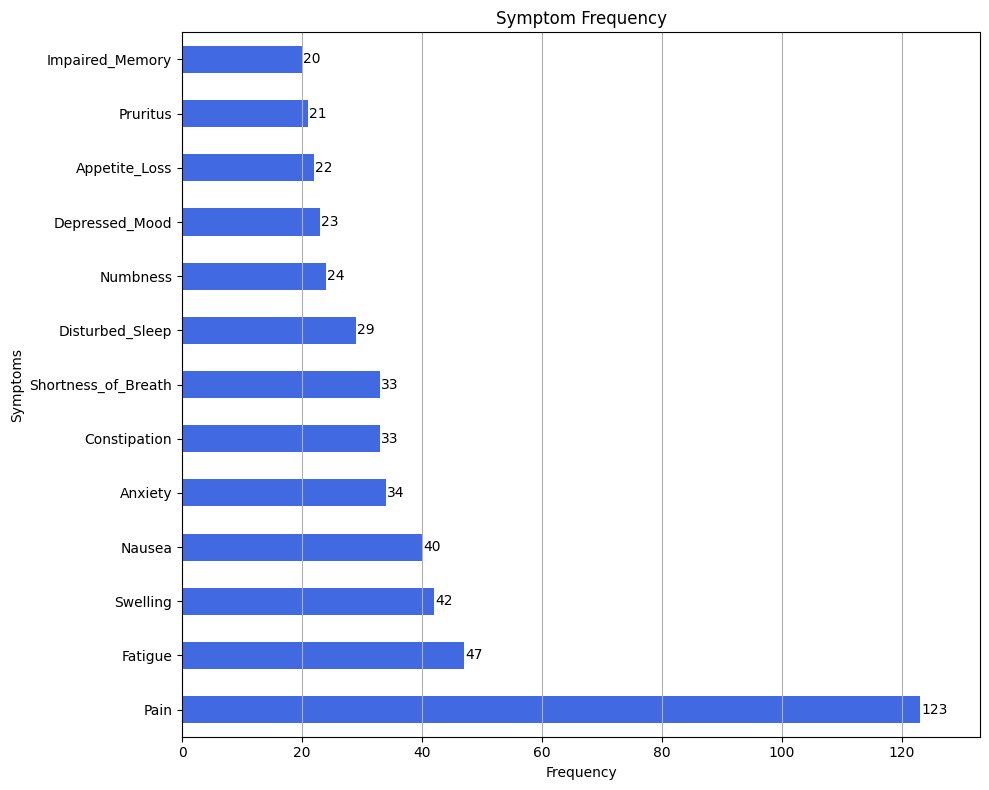

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Selecting symptom columns
symptoms = ['Fatigue', 'Depressed_Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
            'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep']

# Count the frequency of each symptom based on the 'Counted' column
symptom_counts = df_external[symptoms].sum(axis=0).sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
symptom_counts.plot(kind='barh', ax=ax, color='royalblue')

# Add labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    label_x_pos = width + 0.2  # Adjust this value for label positioning
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Settings for the chart
ax.set_xlim(0, max(symptom_counts) + 10)  # Adjust the limit as needed
ax.set_title("Symptom Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("Symptoms")
ax.grid(axis='x')

plt.tight_layout()

# Save the figure as an image (e.g., PNG)
plt.savefig('symptom_frequency1.png', bbox_inches='tight')

plt.show()


/tmp/ipykernel_126/928486180.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_external['Length'], bins=20, kde=True)


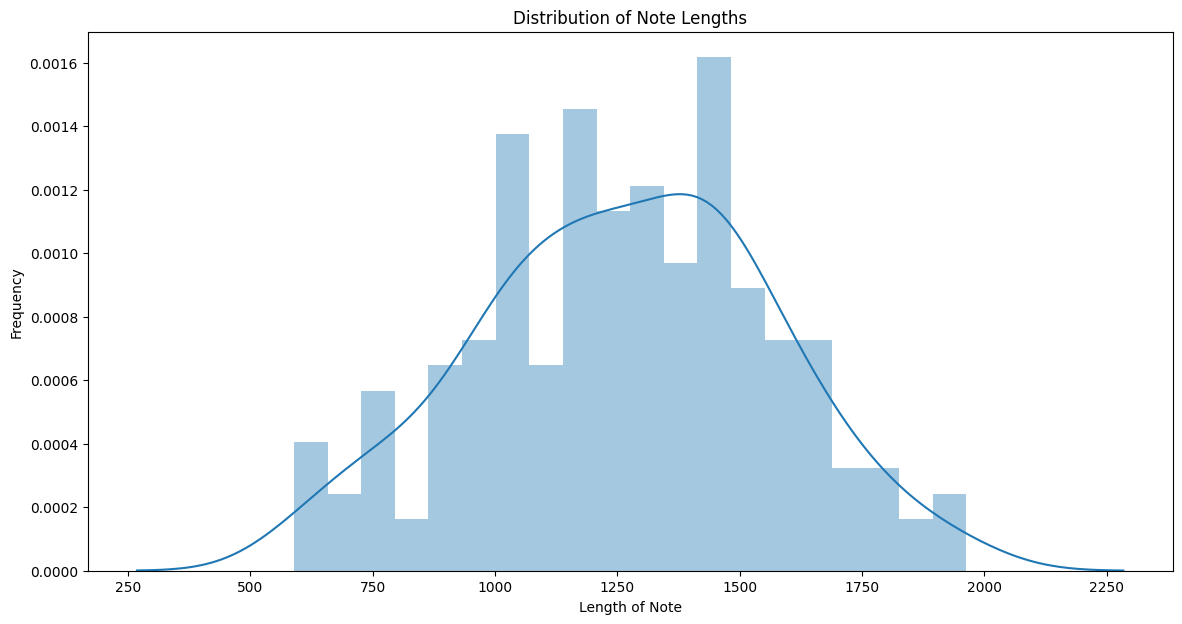

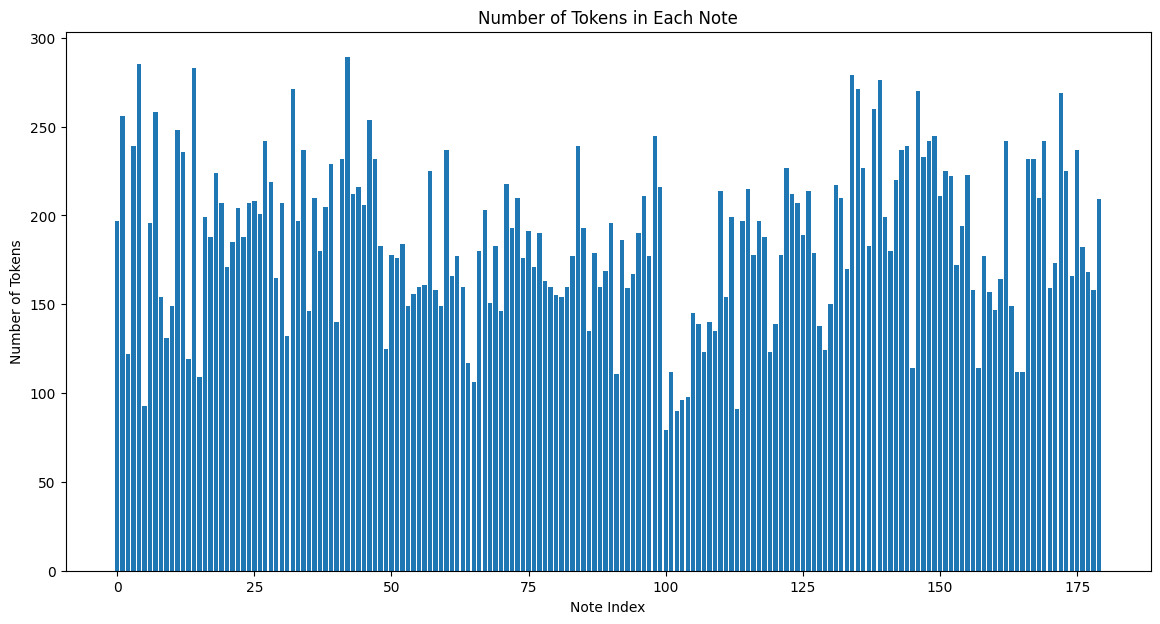

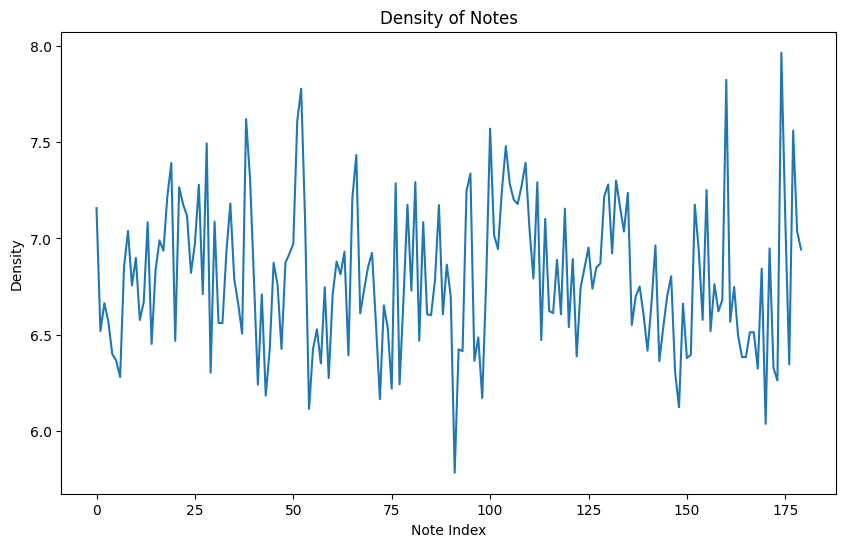

,note id,Note,Fatigue,Depressed_Mood,Constipation,Anxiety,Swelling,Nausea,Appetite_Loss,Pain,Numbness,Impaired_Memory,Pruritus,Shortness_of_Breath,Disturbed_Sleep,Length,Num_Tokens,Density
0,70148097,in the case of the patient reviewed this morni...,0,1,0,0,0,0,0,0.0,1,0,0,0,0,1410,197,7.157360
1,217167512,over the last hours the patients vital signs h...,0,0,0,0,0,0,1,0.0,0,0,0,0,0,1669,256,6.519531
2,545048125,a yearold female with a history of adenocarcin...,0,1,0,0,0,0,0,0.0,0,0,0,1,0,813,122,6.663934
3,119716181,the patient a student actively engaged in work...,1,0,0,0,0,0,0,NaN,0,0,0,0,0,1570,239,6.569038
4,39350104,a yearold male had a clinic visit on for a fol...,0,0,0,0,0,0,0,1.0,0,0,0,0,0,1824,285,6.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3696519,a yearold male patient with a complex medical ...,0,0,0,0,1,0,0,1.0,1,0,0,1,0,1682,237,7.097046
176,545205250,in a physical therapy session dated a yearold ...,1,0,0,1,0,0,0,1.0,1,0,0,0,1,1155,182,6.346154
177,348706864,a patient with a history of arthropathy and ty...,0,0,1,0,0,0,0,1.0,0,0,1,0,0,1270,168,7.559524
178,1336650425,a patient with a history of malignant melanoma...,0,1,0,1,0,1,0,1.0,0,1,0,0,1,1112,158,7.037975


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_external is your DataFrame and 'Note' is the column with text data.

# Calculate the length of each note
df_external['Length'] = df_external['Note'].apply(len)

# Calculate the number of tokens in each note (simple split by space)
df_external['Num_Tokens'] = df_external['Note'].apply(lambda x: len(x.split()))

# Calculate the density of each note (length / number of tokens)
df_external['Density'] = df_external['Length'] / df_external['Num_Tokens']

# Visualizations
plt.figure(figsize=(14, 7))
sns.distplot(df_external['Length'], bins=20, kde=True)
plt.title('Distribution of Note Lengths')
plt.xlabel('Length of Note')
plt.ylabel('Frequency')
plt.show()

# Number of tokens in each note
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
plt.bar(range(len(df_external['Num_Tokens'])), df_external['Num_Tokens'])
plt.title('Number of Tokens in Each Note')
plt.xlabel('Note Index')
plt.ylabel('Number of Tokens')
# Here we do not set xticks due to large number of rows
plt.show()

# Density of each note
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_external.index, y=df_external['Density'])
plt.title('Density of Notes')
plt.xlabel('Note Index')
plt.ylabel('Density')
plt.show()

df_external

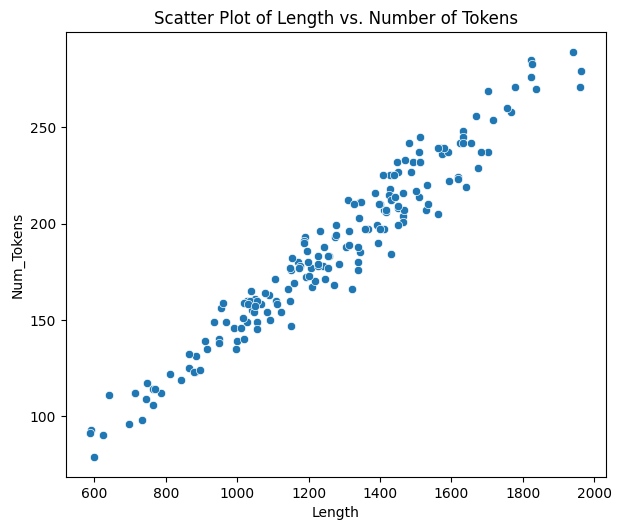

In [34]:
# We will create a series of visualizations to represent the dataset effectively.

# Before creating visualizations, let's ensure we have all the necessary calculations
df_external['Length'] = df_external['Note'].apply(len)
df_external['Num_Tokens'] = df_external['Note'].apply(lambda x: len(x.split()))
df_external['Density'] = df_external['Length'] / df_external['Num_Tokens']

# Let's create each of the visualizations mentioned.

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))



# Scatter Plot for Length vs. Number of Tokens
plt.subplot(2, 3, 3)
sns.scatterplot(x='Length', y='Num_Tokens', data=df_external)
plt.title('Scatter Plot of Length vs. Number of Tokens')



# Adjust layout
plt.tight_layout()

plt.show()

In [35]:
length_stats = {
    'Min Length': df_external['Length'].min(),
    'Max Length': df_external['Length'].max(),
    'Length Range': df_external['Length'].max() - df_external['Length'].min()
}

token_stats = {
    'Min Num_Tokens': df_external['Num_Tokens'].min(),
    'Max Num_Tokens': df_external['Num_Tokens'].max(),
    'Num_Tokens Range': df_external['Num_Tokens'].max() - df_external['Num_Tokens'].min()
}

density_stats = {
    'Min Density': df_external['Density'].min(),
    'Max Density': df_external['Density'].max(),
    'Density Range': df_external['Density'].max() - df_external['Density'].min()
}

# Now we print all the statistics including density
print('Length Statistics:')
for key, value in length_stats.items():
    print(f"{key}: {value}")

print('\nNumber of Tokens Statistics:')
for key, value in token_stats.items():
    print(f"{key}: {value}")

print('\nDensity Statistics:')
for key, value in density_stats.items():
    print(f"{key}: {value}")


Length Statistics:
Min Length: 589
Max Length: 1963
Length Range: 1374

Number of Tokens Statistics:
Min Num_Tokens: 79
Max Num_Tokens: 289
Num_Tokens Range: 210

Density Statistics:
Min Density: 5.783783783783784
Max Density: 7.963855421686747
Density Range: 2.180071637902963


In [36]:
# List of new symptoms
symptoms = ['Fatigue', 'Disturbed_Sleep', 'Depressed_Mood', 'Constipation', 'Anxiety',
           'Shortness_of_Breath', 'Swelling', 'Nausea',
           'Appetite_Loss', 'Pain', 'Numbness', 'Pruritus', 'Impaired_Memory']

# Sample size for each symptom
sample_size = 100

# Fetch records based on the new symptoms and sample them
dfs = {}
for symptom in symptoms:
    symptom_df = df_external.loc[df_external[symptom] == 1]
    # Ensure there are enough records to sample
    if len(symptom_df) >= sample_size:
        dfs[symptom] = symptom_df.sample(n=sample_size, random_state=1)
    else:
        dfs[symptom] = symptom_df

# Concatenate the dataframes for each symptom
df = pd.concat(dfs.values())

# Convert all NANs to '0' and positive values to 1 
tmp = df_external[symptoms]
tmp = tmp.fillna('0') # replace all NANs with 0
tmp = tmp.astype(int).apply(lambda x: [y if y <= 1 else 1 for y in x]) # convert all non-NANs to '1' 
df_external[symptoms] = tmp

# Here I'm retaining only the 'Note' column and the 'Fatigue' symptom as a sample. 
# You can adjust this according to which columns you want in the final dataframe.
df_external = df_external[['Note'] + symptoms] 

# Remove duplicate text
df_external = df_external.drop_duplicates(subset=['Note'])

print(df_external.shape)
df_external.info()

(178, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Note                 178 non-null    object
 1   Fatigue              178 non-null    int64 
 2   Disturbed_Sleep      178 non-null    int64 
 3   Depressed_Mood       178 non-null    int64 
 4   Constipation         178 non-null    int64 
 5   Anxiety              178 non-null    int64 
 6   Shortness_of_Breath  178 non-null    int64 
 7   Swelling             178 non-null    int64 
 8   Nausea               178 non-null    int64 
 9   Appetite_Loss        178 non-null    int64 
 10  Pain                 178 non-null    int64 
 11  Numbness             178 non-null    int64 
 12  Pruritus             178 non-null    int64 
 13  Impaired_Memory      178 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 20.9+ KB


In [37]:
df_external.to_csv('gpt_external.csv', index=False)


In [38]:
import pandas as pd

# Assuming df_external is already loaded and is a DataFrame
# Randomly select 50 rows from df_external
df_sample = df_external.sample(n=30, random_state=42)

# Save the sampled DataFrame to a CSV file
#df_sample.to_csv('gpt_external_sampled.csv', index=False)



In [39]:
import pandas as pd 
df = pd.read_csv("new_corpus_14_symptoms_counted.csv")
df

,Unnamed: 0,goldID,text,Fatigue,Depressed_Mood,Constipation,Anxiety,Swelling,Nausea,Appetite_Loss,Pain,Numbness,Impaired_Memory,Pruritus,Headache,Shortness_of_Breath,Disturbed_Sleep,Counted
0,355,356,authorizing provider younke denise l arnp asso...,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,112,113,tube feeds increased to hr patient accidentall...,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,2
2,360,361,no recent fevers chills night sweats fatigue u...,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1055,1056,moderate right flank right lateral mid thigh c...,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,387,388,indications constipation cap flaxseed oil po t...,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,284,285,risks discussed include not limited to infecti...,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,2
1108,487,488,left spinal epidural sensory level n right spi...,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1109,529,530,allergies allergen reactions latex unknown vbc...,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1110,941,942,omeprazole abdominal bloating gastaking gasx e...,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [40]:
df = df.rename(columns={
    'text': 'Note'})

In [41]:
print(df.columns)

Index(['Unnamed: 0', 'goldID', 'Note', 'Fatigue', 'Depressed_Mood',
       'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
       'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Headache',
       'Shortness_of_Breath', 'Disturbed_Sleep', 'Counted'],
      dtype='object')


In [42]:
df = df.drop('Headache', axis=1)

In [43]:
# List of new symptoms
symptoms = ['Fatigue', 'Disturbed_Sleep', 'Depressed_Mood', 'Constipation', 'Anxiety',
           'Shortness_of_Breath', 'Swelling', 'Nausea',
           'Appetite_Loss', 'Pain', 'Numbness', 'Pruritus', 'Impaired_Memory']

# Sample size for each symptom
sample_size = 400

# Fetch records based on the new symptoms and sample them
dfs = {}
for symptom in symptoms:
    symptom_df = df.loc[df[symptom] == 1]
    # Ensure there are enough records to sample
    if len(symptom_df) >= sample_size:
        dfs[symptom] = symptom_df.sample(n=sample_size, random_state=1)
    else:
        dfs[symptom] = symptom_df

# Concatenate the dataframes for each symptom
df = pd.concat(dfs.values())

# Convert all NANs to '0' and positive values to 1 
tmp = df[symptoms]
tmp = tmp.fillna('0') # replace all NANs with 0
tmp = tmp.astype(int).apply(lambda x: [y if y <= 1 else 1 for y in x]) # convert all non-NANs to '1' 
df[symptoms] = tmp

# Here I'm retaining only the 'Note' column and the 'Fatigue' symptom as a sample. 
# You can adjust this according to which columns you want in the final dataframe.
df = df[['Note'] + symptoms] 

# Remove duplicate text
df = df.drop_duplicates(subset=['Note'])

print(df.shape)
df.info()

(976, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 2 to 1098
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Note                 976 non-null    object
 1   Fatigue              976 non-null    int64 
 2   Disturbed_Sleep      976 non-null    int64 
 3   Depressed_Mood       976 non-null    int64 
 4   Constipation         976 non-null    int64 
 5   Anxiety              976 non-null    int64 
 6   Shortness_of_Breath  976 non-null    int64 
 7   Swelling             976 non-null    int64 
 8   Nausea               976 non-null    int64 
 9   Appetite_Loss        976 non-null    int64 
 10  Pain                 976 non-null    int64 
 11  Numbness             976 non-null    int64 
 12  Pruritus             976 non-null    int64 
 13  Impaired_Memory      976 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 114.4+ KB


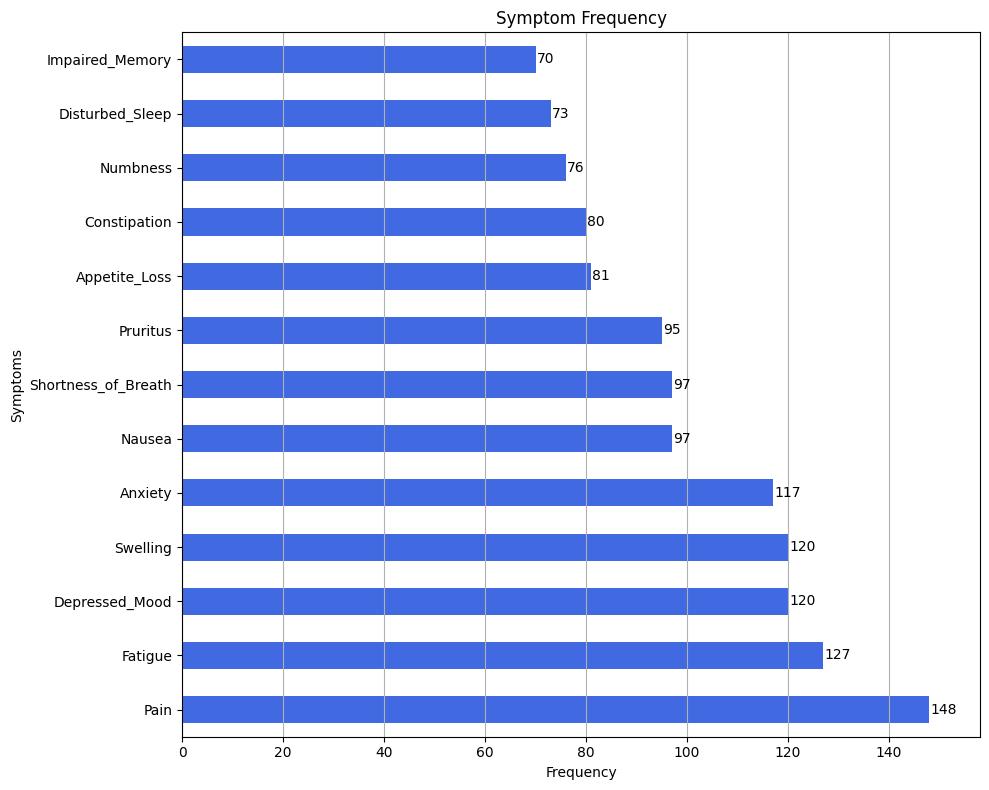

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Selecting symptom columns
symptoms = ['Fatigue', 'Depressed_Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
            'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep']

# Count the frequency of each symptom based on the 'Counted' column
symptom_counts = df[symptoms].sum(axis=0).sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
symptom_counts.plot(kind='barh', ax=ax, color='royalblue')

# Add labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    label_x_pos = width + 0.2  # Adjust this value for label positioning
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Settings for the chart
ax.set_xlim(0, max(symptom_counts) + 10)  # Adjust the limit as needed
ax.set_title("Symptom Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("Symptoms")
ax.grid(axis='x')

plt.tight_layout()

# Save the figure as an image (e.g., PNG)
plt.savefig('symptom_frequency.png', bbox_inches='tight')

plt.show()


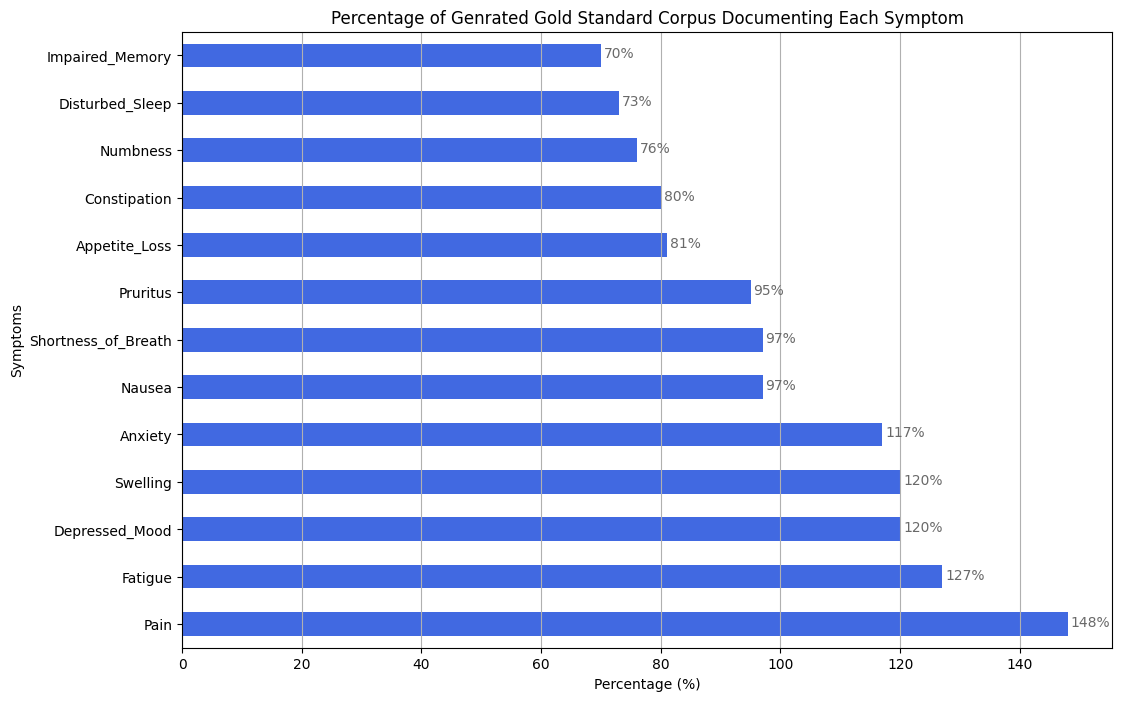

'Genrated Gold Standard Corpus Documenting_symptom_percentages_plot_vertical.png'

In [45]:
# Recreating the plot with percentages displayed on each bar, sorted in descending order


# Selecting symptom columns
symptoms = ['Fatigue', 'Depressed_Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
            'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep']

# Count the frequency of each symptom based on the 'Counted' column
sorted_symptom_percentages_desc  = df[symptoms].sum(axis=0).sort_values(ascending=False)


# Sorting the symptom percentages in descending order
#sorted_symptom_percentages_desc = df .drop(columns=['note id', 'Note', 'Counted']).mean().sort_values(ascending=False) * 100

# Creating a vertical bar plot with sorted data
plt.figure(figsize=(12, 8))
ax = sorted_symptom_percentages_desc.plot(kind='barh', color='royalblue')  # Horizontal bar chart
plt.title('Percentage of Genrated Gold Standard Corpus Documenting Each Symptom')
plt.ylabel('Symptoms')
plt.xlabel('Percentage (%)')
plt.grid(axis='x')

# Adding the percentage values on each bar
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + 0.2, str(round(i.get_width(), 2)) + '%', fontsize=10, color='dimgrey')

# Saving the plot as a PNG file
sorted_desc_plot_path_vertical = 'Genrated Gold Standard Corpus Documenting_symptom_percentages_plot_vertical.png'
plt.savefig(sorted_desc_plot_path_vertical)

# Showing the plot
plt.show()

# Providing the file path for download
sorted_desc_plot_path_vertical

Learning Rate Scheduling: A learning rate scheduler (get_linear_schedule_with_warmup) was added to adjust the learning rate as training progresses. It starts with a warmup period where the learning rate gradually increases and then linearly decreases. This can lead to better convergence by allowing the model to initially explore the parameter space with larger steps and then fine-tune with smaller steps.

Gradient Clipping: The addition of gradient clipping (torch.nn.utils.clip_grad_norm_) prevents the gradients from becoming too large, which can cause the model to become unstable or diverge during training. This technique is especially useful for preventing the "exploding gradients" problem.

Weight Decay: Weight decay was introduced in the optimizer (AdamW) as a regularization parameter. It works by adding a penalty to the loss function based on the magnitude of the weights, which can help in preventing overfitting by discouraging overly complex models.

Validation During Training: The training function now includes validation loss calculation at the end of each epoch. By passing the external dataset as the validation dataset, you can monitor the model's performance on this dataset during training. This allows you to detect overfitting early if the validation loss starts to increase while the training loss continues to decrease.

Increased Epochs: The number of epochs was increased to 5 for longer training, which can be beneficial if the model was not previously converging.

Hyperparameter Tuning: Hyperparameters such as the learning rate and weight decay were set to specific values. These values are often chosen based on experience, previous experiments, or through a hyperparameter search process. The values shown (learning_rate=3e-5, weight_decay=0.01) are just examples, and in practice, you would need to try different values to see what works best for your dataset.

Output Messages: The print statements within the training loop now output both the training and validation loss after each epoch, giving you immediate feedback on the training process and allowing for a quick response to potential issues like overfitting.

model_name = "New_Bio-Clinical_BERT_finetuned"

In [46]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset

# Set the seed for reproducibility
torch.manual_seed(42)

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = pd.concat([train_df, df_sample], ignore_index=True)

# Define the  model and tokenizer
model_name = "New_Bio-Clinical_BERT_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Assuming all columns after 'Note' in the dataframe are symptom labels
symptoms = df.columns[1:].tolist()
ex_symptoms = df_external.columns[1:].tolist()
num_symptoms = len(symptoms)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_symptoms)

# Process the datasets
def process_data(df, symptoms, tokenizer):
    texts = df['Note'].tolist()  # Replace 'Note' with the correct column name if different
    labels = df[symptoms].values.tolist()
    encodings = tokenizer(texts, truncation=True, padding=True, return_tensors="pt")
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    labels_tensor = torch.tensor(labels, dtype=torch.float32)
    dataset = TensorDataset(input_ids, attention_mask, labels_tensor)
    return dataset

train_dataset = process_data(train_df, symptoms, tokenizer)
test_dataset = process_data(test_df, symptoms, tokenizer)
external_dataset = process_data(df_external, ex_symptoms, tokenizer)

# Define the data loaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
external_loader = DataLoader(external_dataset, batch_size=batch_size, shuffle=False)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Define the loss function
loss_fct = nn.BCEWithLogitsLoss()

# Evaluation function
def evaluate(model, data_loader, device, loss_fct):
    model.eval()
    total_loss = 0.0
    for batch in data_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fct(logits, labels)
            total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    return avg_loss

# Fine-tuning function
def fine_tune_model(model, train_loader, val_loader, device, epochs, learning_rate, weight_decay):
    optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = loss_fct(logits, labels)
            total_loss += loss.item()

            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

        # Evaluation on the validation set
        val_loss = evaluate(model, val_loader, device, loss_fct)
        print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader):.4f}, Val Loss: {val_loss:.4f}")

# Call the fine-tuning function with the training and external dataset as validation
fine_tune_model(model, train_loader, external_loader, device, epochs=5, learning_rate=3e-5, weight_decay=0.01)

# After fine-tuning, evaluate on test and external datasets
test_loss = evaluate(model, test_loader, device, loss_fct)
external_loss = evaluate(model, external_loader, device, loss_fct)

print(f"Test Loss: {test_loss:.4f}")
print(f"External Test Loss: {external_loss:.4f}")

Some weights of the model checkpoint at New_Bio-Clinical_BERT_finetuned were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at New_Bio-Clini

Epoch 1 Loss: 0.3444, Val Loss: 0.4831
Epoch 2 Loss: 0.2363, Val Loss: 0.4243
Epoch 3 Loss: 0.1674, Val Loss: 0.3944
Epoch 4 Loss: 0.1317, Val Loss: 0.3786
Epoch 5 Loss: 0.1145, Val Loss: 0.3640
Test Loss: 0.1430
External Test Loss: 0.3640


In [47]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix

# Assuming you've already defined and loaded your model, symptoms list, test_loader, external_loader, and device

def evaluate_model(data_loader, symptoms, model, device):
    model.eval()

    # Initialize dictionaries to store predictions and true labels for each symptom
    predictions = {symptom: [] for symptom in symptoms}
    true_labels = {symptom: [] for symptom in symptoms}

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].cpu().numpy()  # Convert labels tensor to numpy array

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()  # Convert logits tensor to numpy array

            # Update predictions and true labels for each symptom
            for idx, symptom in enumerate(symptoms):
                predictions[symptom].extend(logits[:, idx].tolist())
                true_labels[symptom].extend(labels[:, idx].tolist())

    # Initialize dictionaries to store metrics for each symptom
    metrics = {
        'precision': {},
        'recall': {},
        'f1_score': {},
        'specificity': {},
        'accuracy': {},
        'auprc': {},
        'auc': {}
    }

    for symptom in symptoms:
        # Binarize predictions (considering 0.5 as threshold for demonstration)
        binarized_predictions = [1 if pred >= 0.5 else 0 for pred in predictions[symptom]]
        
        tn, fp, fn, tp = confusion_matrix(true_labels[symptom], binarized_predictions).ravel()
        
        specificity = tn / (tn + fp)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        
        report = classification_report(true_labels[symptom], binarized_predictions, output_dict=True, zero_division=0)
        
        metrics['precision'][symptom] = report['weighted avg']['precision']
        metrics['recall'][symptom] = report['weighted avg']['recall']  # Same as sensitivity
        metrics['f1_score'][symptom] = report['weighted avg']['f1-score']
        metrics['specificity'][symptom] = specificity
        metrics['accuracy'][symptom] = accuracy

        precision, recall, _ = precision_recall_curve(true_labels[symptom], predictions[symptom])
        metrics['auprc'][symptom] = auc(recall, precision)
        
        metrics['auc'][symptom] = roc_auc_score(true_labels[symptom], predictions[symptom])

    return metrics

# Evaluate on test dataset
test_metrics = evaluate_model(test_loader, symptoms, model, device)

# Evaluate on external dataset
external_metrics = evaluate_model(external_loader, ex_symptoms, model, device)

# Convert dictionaries to DataFrames
test_df_metrics = pd.DataFrame({
    'Symptom': list(symptoms),
    'Test Precision': [test_metrics['precision'][s] for s in symptoms],
    'Test Recall': [test_metrics['recall'][s] for s in symptoms],
    'Test F1 Score': [test_metrics['f1_score'][s] for s in symptoms],
    'Test AUC': [test_metrics['auc'][s] for s in symptoms]
})

external_df_metrics = pd.DataFrame({
    'Symptom': list(ex_symptoms),
    'External Precision': [external_metrics['precision'][s] for s in ex_symptoms],
    'External Recall': [external_metrics['recall'][s] for s in ex_symptoms],
    'External F1 Score': [external_metrics['f1_score'][s] for s in ex_symptoms],
    'External AUC': [external_metrics['auc'][s] for s in ex_symptoms]
})

# Print the dataframes for a tabular view
print("Test Dataset Metrics:")
print(test_df_metrics)
print("\nExternal Dataset Metrics:")
print(external_df_metrics)


Test Dataset Metrics:
                Symptom  Test Precision  Test Recall  Test F1 Score  Test AUC
0               Fatigue        0.948288     0.948980       0.944186  0.971350
1       Disturbed_Sleep        0.984110     0.984694       0.984264  0.981581
2        Depressed_Mood        0.922292     0.928571       0.921437  0.875914
3          Constipation        0.963334     0.964286       0.963301  0.908772
4               Anxiety        0.947575     0.948980       0.943169  0.961648
5   Shortness_of_Breath        0.970403     0.969388       0.967095  0.902313
6              Swelling        0.941715     0.943878       0.939872  0.961637
7                Nausea        0.957668     0.959184       0.958165  0.945584
8         Appetite_Loss        0.975172     0.974490       0.971890  0.894427
9                  Pain        0.935499     0.938776       0.935129  0.963509
10             Numbness        0.973845     0.974490       0.974085  0.890239
11             Pruritus        0.985128   

In [48]:
test_df_metrics.to_excel('new_180_finetuning_gpt_test_bioclinicalimillion.xlsx', index=False)

In [49]:
external_df_metrics.to_excel('new_180_finetuning_gpt_external_bioclinical1million.xlsx', index=False)